<a href="https://colab.research.google.com/github/DatumLearning/YOLOv8_Segmentation_image/blob/main/yolo_seg_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.0/262.0 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 KB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 14.9 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [3]:
model = YOLO("yolov8m-seg.pt")

  0%|          | 0.00/52.4M [00:00<?, ?B/s]

In [4]:
predict = model.predict("/content/doggo.jpg" , save = True , save_txt = True)

Ultralytics YOLOv8.0.23 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
YOLOv8m-seg summary (fused): 245 layers, 27268704 parameters, 0 gradients, 110.2 GFLOPs
image 1/1 /content/doggo.jpg: 480x640 1 bicycle, 1 truck, 1 dog, 1588.7ms
Speed: 3.0ms pre-process, 1588.7ms inference, 26.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict
1 label saved to runs/segment/predict/labels


In [5]:
predict[0].masks.data[0].unique()

tensor([0., 1.])

In [6]:
H , W , _ = cv2.imread("/content/doggo.jpg").shape

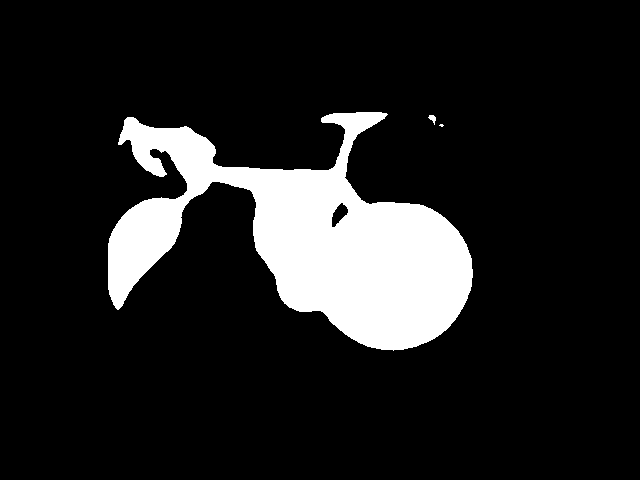

In [7]:
cv2_imshow((predict[0].masks.masks[0].numpy() * 255).astype("uint8"))

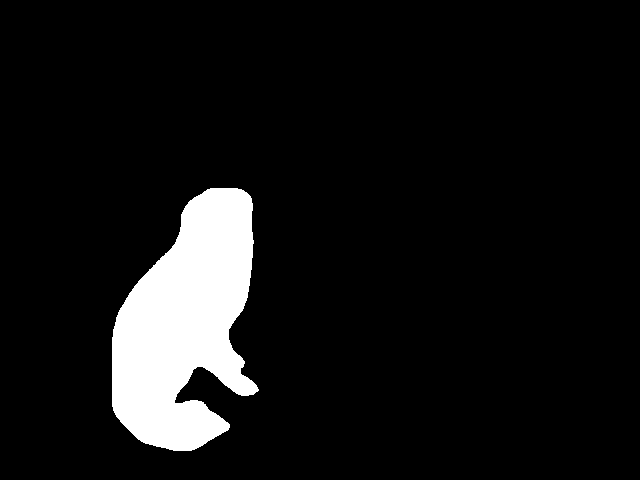

In [8]:
cv2_imshow((predict[0].masks.masks[1].numpy() * 255).astype("uint8"))

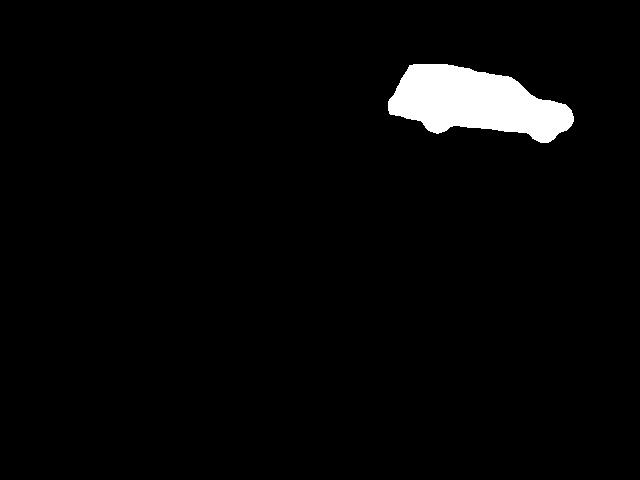

In [9]:
cv2_imshow((predict[0].masks.masks[2].numpy() * 255).astype("uint8"))

In [10]:
x = (predict[0].masks.segments[2][: , 0] * W).astype("int")
y = (predict[0].masks.segments[2][: , 1] * H).astype("int")

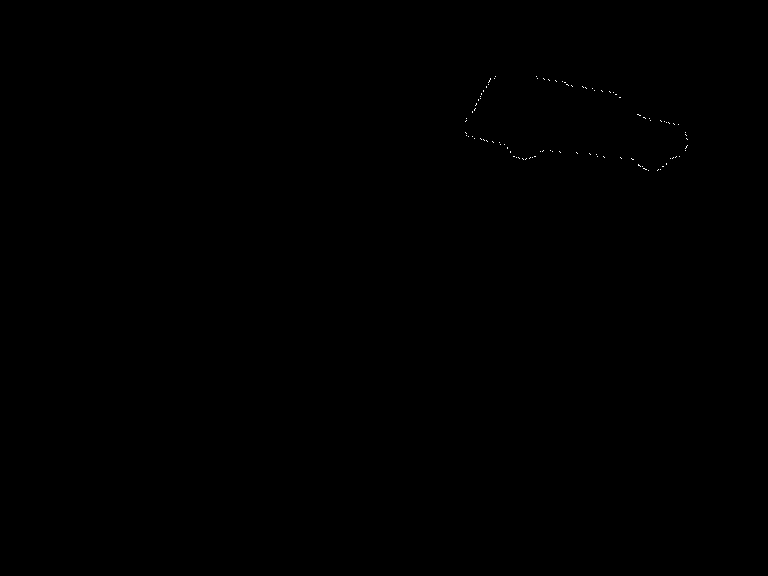

In [11]:
blk = np.zeros((H , W))
blk[y , x] = 255
cv2_imshow(blk.astype("uint8"))

In [16]:
outs = open("/content/runs/segment/predict/labels/doggo.txt" , "r").readlines()

In [33]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , 
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , 
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , 
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , 
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [39]:
for dt in outs:
  print(int(dt.split()[0]) , coco_names[int(dt.split()[0])])

7 truck
16 cat
1 bicycle
